In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')
  df = pd.read_csv(fn)
  display(df.head())

KeyboardInterrupt: 

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split       #automatically shuffle
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device Used {device} ")

Device Used cuda 


In [4]:
# set manual seed for reproduciblitly
torch.manual_seed(42)

In [6]:
df = pd.read_csv('/content/fashion-mnist_train.csv')
df.shape

(3786, 785)

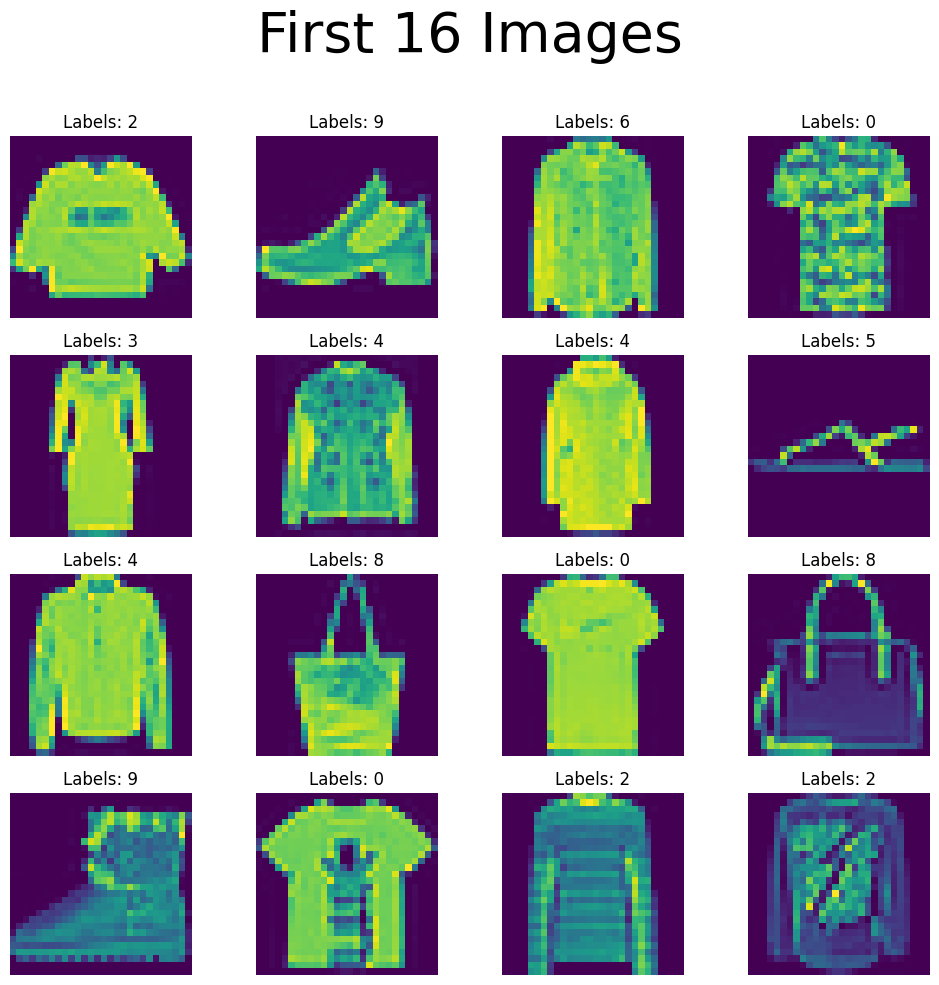

In [7]:
# create a 4x4 grid of images
fig, axes  = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize = 40)

#plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  #reshape to 28x28
    ax.imshow(img)    #display the grayscale
    ax.axis('off')
    ax.set_title(f"Labels: {df.iloc[i, 0]}")

plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.show()

In [15]:
x = df.iloc[: , 1:].values
y = df.iloc[: , 0].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train = x_train/255.0
x_test = x_test/255.0

In [29]:
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype = torch.float32)
        self.labels = torch.tensor(labels, dtype = torch.long)
    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        return self.features[index], self.labels[index]
# create train_dataset object
train_dataset = CustomDataset(x_train, y_train)
# create test dataset
test_dataset = CustomDataset(x_test, y_test)
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = False)

In [30]:
class MyNN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)


learning_rate = 0.1
epochs = 100


In [31]:
# instantiate the model
model = MyNN(x_train.shape[1])
model.to(device)

# loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [32]:
# training loop
for epoch in range(epochs):
    total_epoch_loss = 0
    for batch_features, batch_labels in train_loader:

      batch_features , batch_labels = batch_features.to(device), batch_labels.to(device)
      # forward pass
      outputs = model(batch_features)


      # calculate loss
      loss = criterion(outputs, batch_labels)


      # backpropagation
      optimizer.zero_grad()
      loss.backward()


      # update gradients
      optimizer.step()
      total_epoch_loss+= loss.item()
    avg_loss = total_epoch_loss/len(train_loader)
    print(f'Epoch: {epoch+1} , Loss: {avg_loss}')

Epoch: 1 , Loss: nan
Epoch: 2 , Loss: nan
Epoch: 3 , Loss: nan
Epoch: 4 , Loss: nan
Epoch: 5 , Loss: nan
Epoch: 6 , Loss: nan
Epoch: 7 , Loss: nan
Epoch: 8 , Loss: nan
Epoch: 9 , Loss: nan
Epoch: 10 , Loss: nan
Epoch: 11 , Loss: nan
Epoch: 12 , Loss: nan
Epoch: 13 , Loss: nan
Epoch: 14 , Loss: nan
Epoch: 15 , Loss: nan
Epoch: 16 , Loss: nan
Epoch: 17 , Loss: nan
Epoch: 18 , Loss: nan
Epoch: 19 , Loss: nan
Epoch: 20 , Loss: nan
Epoch: 21 , Loss: nan
Epoch: 22 , Loss: nan
Epoch: 23 , Loss: nan
Epoch: 24 , Loss: nan
Epoch: 25 , Loss: nan
Epoch: 26 , Loss: nan
Epoch: 27 , Loss: nan
Epoch: 28 , Loss: nan
Epoch: 29 , Loss: nan
Epoch: 30 , Loss: nan
Epoch: 31 , Loss: nan
Epoch: 32 , Loss: nan
Epoch: 33 , Loss: nan
Epoch: 34 , Loss: nan
Epoch: 35 , Loss: nan
Epoch: 36 , Loss: nan
Epoch: 37 , Loss: nan
Epoch: 38 , Loss: nan
Epoch: 39 , Loss: nan
Epoch: 40 , Loss: nan
Epoch: 41 , Loss: nan
Epoch: 42 , Loss: nan
Epoch: 43 , Loss: nan
Epoch: 44 , Loss: nan
Epoch: 45 , Loss: nan
Epoch: 46 , Loss: n

In [33]:

model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [24]:
total = 0
correct = 0

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        outputs = model(batch_features)
        _, predicted = torch.max(outputs, 1)

        total = total + batch_labels.shape[0]

        correct = correct + (predicted==batch_labels).sum().item()

print(correct/total)

RuntimeError: Expected all tensors to be on the same device, but got mat1 is on cpu, different from other tensors on cuda:0 (when checking argument in method wrapper_CUDA_addmm)